# Lecture 6.3: Multiple Regressions II

## Outline

* Dummy variables for indicator and categorical data
* Interaction terms
    * Interactions between continuous and categorical variables
    * Interactions between continuous and continuous variables
* Variable selection - stepwise regression

In [1]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

from seaborn import lmplot

Populating the interactive namespace from numpy and matplotlib


In [2]:
fake_puppy_data = pd.DataFrame()
fake_puppy_data['num_puppies'] = np.abs(np.random.normal(3,4,size=1000)).round()
fake_puppy_data[fake_puppy_data['num_puppies']==0] = 1
other_animals = ['yes','no']
fake_puppy_data['has_other_animals'] = np.random.choice(other_animals,replace=True,size=1000,p=[0.2,0.8])
age_groups = ['puppy','dog','elderly dog']
fake_puppy_data['age_group'] = np.random.choice(age_groups,replace=True,size=1000,p=[0.5,0.2,0.3])
fake_puppy_data['score'] = 4.231  * fake_puppy_data['num_puppies'] + \
                           24.213 * (fake_puppy_data['has_other_animals']=='yes') + \
                           -0.340 * (fake_puppy_data['has_other_animals']=='no') + \
                           20.453 * (fake_puppy_data['age_group']=='puppy') + \
                           -6.543 * (fake_puppy_data['age_group']=='dog') + \
                           14.568 * (fake_puppy_data['age_group']=='elderly dog') + \
                           6.574  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['has_other_animals'] == 'yes')) + \
                           3.486  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['age_group'] == 'puppy')) + \
                           0.182  * (fake_puppy_data['num_puppies'] * 1.*(fake_puppy_data['age_group'] == 'elderly dog')) + \
                           12.381 + \
                           np.random.normal(15,3,size=1000)
fake_puppy_data['score'] = 100 * ((fake_puppy_data['score']-fake_puppy_data['score'].min())/(fake_puppy_data['score'].max() - fake_puppy_data['score'].min()))

## More stories

My wife likes pictures of puppies. To document this I had her look at and score 1000 photos of puppies (I did not actually do this one in real life).

In [3]:
fake_puppy_data.head(15)

,num_puppies,has_other_animals,age_group,score
0,6.0,no,elderly dog,20.364998
1,2.0,no,puppy,17.805851
2,1.0,no,puppy,15.106689
3,5.0,no,dog,8.953652
4,4.0,no,puppy,26.873529
5,8.0,yes,puppy,71.833907
6,1.0,yes,puppy,27.997737
7,5.0,no,dog,8.369484
8,1.0,yes,elderly dog,25.298608
9,3.0,no,puppy,22.639422


### Data dictionary

* num_puppies is number of puppies in the photo
* has_other_animals is yes if there are other animals in photo, no otherwise
* age_group describes the average age of the dogs in the photo, either puppy, dog, or elderly dog



### Question:
Can I run my current data through statsmodels?

In [4]:
X = fake_puppy_data[['num_puppies','has_other_animals','age_group']]
y = fake_puppy_data.score
model = sm.OLS(y, X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Any ideas on how to deal with this?

## Add dummy variables

In [5]:
data = fake_puppy_data.copy()

In [6]:
data['others_yes'] = 1 * (data.has_other_animals == 'yes') 
data.head(15)

,num_puppies,has_other_animals,age_group,score,others_yes
0,6.0,no,elderly dog,20.364998,0
1,2.0,no,puppy,17.805851,0
2,1.0,no,puppy,15.106689,0
3,5.0,no,dog,8.953652,0
4,4.0,no,puppy,26.873529,0
5,8.0,yes,puppy,71.833907,1
6,1.0,yes,puppy,27.997737,1
7,5.0,no,dog,8.369484,0
8,1.0,yes,elderly dog,25.298608,1
9,3.0,no,puppy,22.639422,0


## How the dummy variable works  
  

$x_i = \left\{\begin{array}{11} 1 & \mbox{if ith picture has other animals} \\ 0 & \mbox{if ith picture has no other animals} \end{array} \right. $

$$y_i \sim \beta_0 + \beta_1 x_i + \epsilon_i = \left\{\begin{array}{11} \beta_0 + \beta_1 + \epsilon_i & \mbox{if ith picture has other animals} \\ \beta_0 + \epsilon_i & \mbox{if ith picture has no other animals} \end{array} \right.$$

## Important 

When you do this you are changing the interpretation of your intercept.  
* What did the intercept mean before?
* What does it mean now?

## Categorical variables

* Basically the same as dummy variables, but with more than two levels
* In general you need number of categories - 1 columns to encode a categorical variable

In [7]:
data['puppy'] = 1 * (data.age_group == 'puppy')
data['elderly'] = 1 * (data.age_group == 'elderly dog')
data.head(15)

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,6.0,no,elderly dog,20.364998,0,0,1
1,2.0,no,puppy,17.805851,0,1,0
2,1.0,no,puppy,15.106689,0,1,0
3,5.0,no,dog,8.953652,0,0,0
4,4.0,no,puppy,26.873529,0,1,0
5,8.0,yes,puppy,71.833907,1,1,0
6,1.0,yes,puppy,27.997737,1,1,0
7,5.0,no,dog,8.369484,0,0,0
8,1.0,yes,elderly dog,25.298608,1,0,1
9,3.0,no,puppy,22.639422,0,1,0


## How this works  
  

$x_{i1} = \left\{\begin{array}{11} 1 & \mbox{if the ith picture has mostly puppies} \\ 0 & \mbox{if the ith picture does not have mostly puppies} \end{array} \right. $

$x_{i2} = \left\{\begin{array}{11} 1 & \mbox{if the ith picture has mostly elderly dogs} \\ 0 & \mbox{if the ith picture does not have mostly elderly dogs} \end{array} \right. $

$$y_i \sim \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i = \left\{\begin{array}{111} \beta_0 + \beta_1 + \epsilon_i & \mbox{if ith picture has mostly puppies} \\ \beta_0 + \beta_2 + \epsilon_i & \mbox{if ith picture has mostly elderly dogs} \\ \beta_0 + \epsilon_i & \mbox{if ith picture has mostly middle aged dogs}\end{array} \right.$$

## Once again
Interpretation of coefficients changes

* What is $\beta_0$ now?
* What is $\beta_1$?
* What is $\beta_2$?

## How do we use this?

In [8]:
data.head()

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,6.0,no,elderly dog,20.364998,0,0,1
1,2.0,no,puppy,17.805851,0,1,0
2,1.0,no,puppy,15.106689,0,1,0
3,5.0,no,dog,8.953652,0,0,0
4,4.0,no,puppy,26.873529,0,1,0


In [9]:
y = data.score
X = data[['num_puppies','others_yes','puppy','elderly']]
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3090.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        14:48:39   Log-Likelihood:                -2764.9
No. Observations:                1000   AIC:                             5540.
Df Residuals:                     995   BIC:                             5564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -4.2175      0.346    -12.205      0.000        -4.896    -3.539
num_puppies     3.1473      0.044     71.112      0.000         3.060     3.234
others_yes     20.8266      0.303     68.625      0.000        20.231    21.422
puppy          16.8966      0.335     50.465      0.000        16.240    17.554
elderly         9.0823      0.366     24.841      0.000         8.365     9.800
==============================================================================
Omnibus:                      227.259   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.223
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Note before we move on

You can add dummy variables to a data frame automatically with pd.get_dummies

### Important
This adds columns for all categories, so it does not have a baseline, you can remove the columns you don't want afterwards

In [10]:
test = pd.get_dummies(fake_puppy_data)
test.head()

,num_puppies,score,has_other_animals_no,has_other_animals_yes,age_group_dog,age_group_elderly dog,age_group_puppy
0,6.0,20.364998,1.0,0.0,0.0,1.0,0.0
1,2.0,17.805851,1.0,0.0,0.0,0.0,1.0
2,1.0,15.106689,1.0,0.0,0.0,0.0,1.0
3,5.0,8.953652,1.0,0.0,1.0,0.0,0.0
4,4.0,26.873529,1.0,0.0,0.0,0.0,1.0


Our model before was fairly good, but how to investigate?

Since we only have 1 continuous variable we can visualize in two dimensions, and we would expect different offsets for each line, but the same slope.

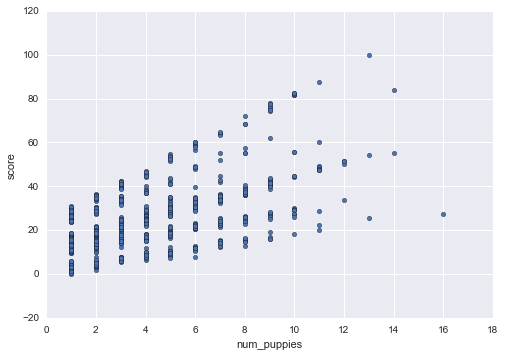

In [11]:
data.plot(x='num_puppies', y='score', kind='scatter');

## Lets try to clear this up a little

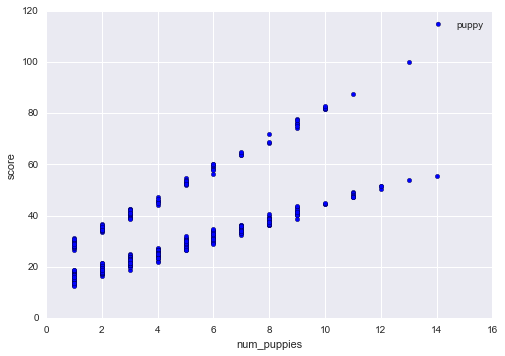

In [12]:
p_data = data[data.puppy == 1]
p_data.plot(x='num_puppies', y='score', kind='scatter', color='b', label='puppy');

### Our model assumes that the slopes of these lines are the same

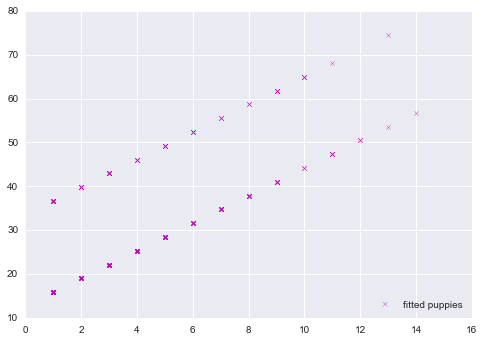

In [13]:
scatter(p_data.num_puppies,
        results.fittedvalues[data.puppy == 1],
        color='m',
        marker='x',
        label='fitted puppies')
legend(loc=4);

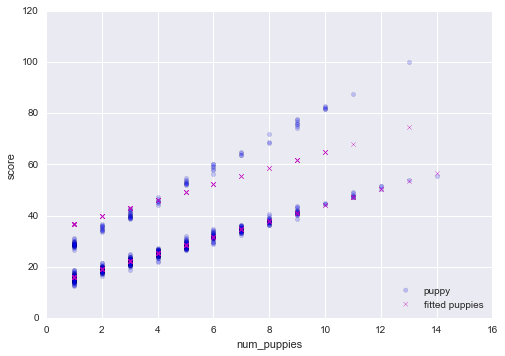

In [14]:
p_data.plot(x='num_puppies', y='score', kind='scatter', color='b', label='puppy', alpha=.2)
scatter(p_data.num_puppies,
        results.fittedvalues[data.puppy == 1],
        color='m',
        marker='x',
        label='fitted puppies')
legend(loc=4);

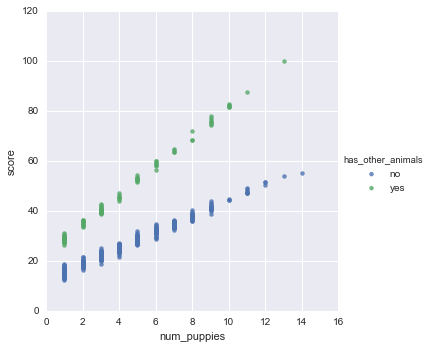

In [15]:
lmplot('num_puppies', 'score', p_data, 'has_other_animals', fit_reg=False);

## Interactions

We can add interaction terms by multiplying columns together
$$y \sim \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \beta_3 \times x_1 \times x_2 $$
so if $x_2$ is other animals:
$$y_i = \left\{\begin{array}{11} (\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times x_{1i} + \epsilon_i & \mbox{if the ith photo has other animals} \\ \beta_0 + \beta_1 \times x_{1i} + \epsilon_i & \mbox{if ith picture has no other animals} \end{array} \right.$$

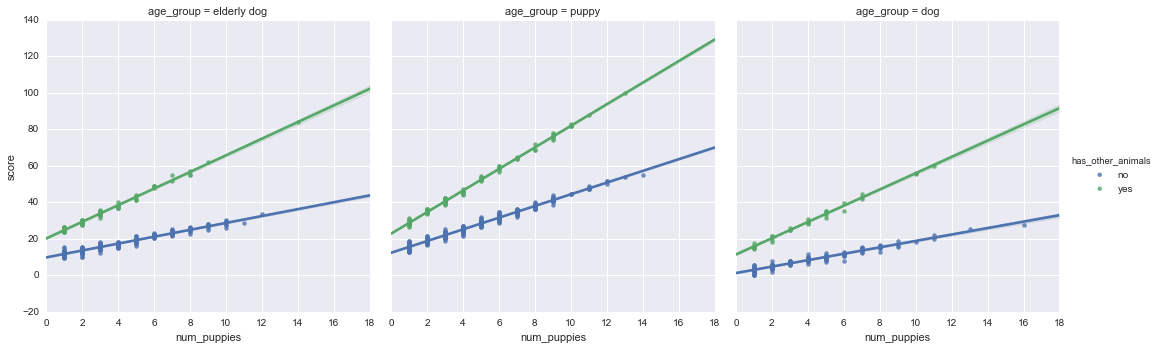

In [16]:
lmplot('num_puppies', 'score', fake_puppy_data, 'has_other_animals', 'age_group');

To make our lives easier, we are going to start using R-style formulas courtesy of the library [`patsy`](http://patsy.readthedocs.io/en/latest/) which should have been installed automatically along with statsmodels.

In [17]:
import statsmodels.formula.api as smf

In [33]:
model2 = smf.ols(formula='score ~ num_puppies + has_other_animals + age_group', data=fake_puppy_data)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     3090.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:59:16   Log-Likelihood:                -2764.9
No. Observations:                1000   AIC:                             5540.
Df Residuals:                     995   BIC:                             5564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -4.2175      0.346    -12.205      0.000        -4.896    -3.539
has_other_animals[T.yes]    20.8266      0.303     68.625      0.000        20.231    21.422
age_group[T.elderly dog]     9.0823      0.366     24.841      0.000         8.365     9.800
age_group[T.puppy]          16.8966      0.335     50.465      0.000        16.240    17.554
num_puppies                  3.1473      0.044     71.112      0.000         3.060     3.234
==============================================================================
Omnibus:                      227.259   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.223
Skew:                           0.861   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that when we use a formula, `patsy` automatically adds an Intercept term and transforms categorical variables into dummies.

In [31]:
data.head()

,num_puppies,has_other_animals,age_group,score,others_yes,puppy,elderly
0,6.0,no,elderly dog,20.364998,0,0,1
1,2.0,no,puppy,17.805851,0,1,0
2,1.0,no,puppy,15.106689,0,1,0
3,5.0,no,dog,8.953652,0,0,0
4,4.0,no,puppy,26.873529,0,1,0


We can also use formulas to model interactions:

In [32]:
formula = 'score ~ num_puppies * others_yes + puppy + elderly'

In [30]:
model3 = smf.ols(formula = formula,data = data)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     7719.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        16:49:12   Log-Likelihood:                -2221.1
No. Observations:                1000   AIC:                             4454.
Df Residuals:                     994   BIC:                             4484.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1.9599      0.207     -9.464      0.000        -2.366    -1.554
num_puppies                2.5598      0.029     88.466      0.000         2.503     2.617
others_yes                10.0795      0.300     33.572      0.000         9.490    10.669
num_puppies:others_yes     2.7811      0.063     44.220      0.000         2.658     2.905
puppy                     16.9853      0.194     87.337      0.000        16.604    17.367
elderly                    9.2451      0.212     43.528      0.000         8.828     9.662
==============================================================================
Omnibus:                       18.018   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.519
Skew:                          -0.213   Prob(JB):                     7.82e-06
Kurtosis:                       3.619   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

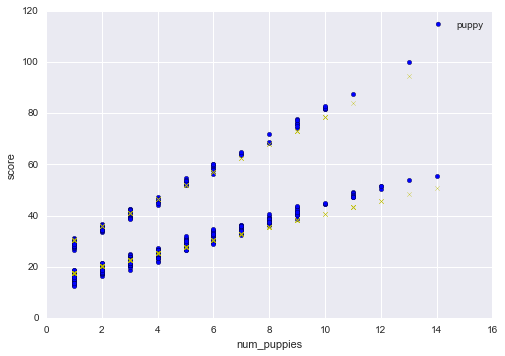

In [22]:
p_data.plot(x='num_puppies',y='score',kind='scatter',color='b',label='puppy')
scatter(p_data.num_puppies, results3.fittedvalues[data['puppy']==1], color='y', marker='x' ,label = 'fitted puppies');

## Interactions between multiple continuous variables

We can add interaction terms by multiplying columns together
$$y \sim \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \beta_3 \times x_1 \times x_2 $$
so if $x_1$ and $x_2$ are both continuous:
$$y_i = \beta_0 + (\beta_1 + \beta_3 \times x_{2i}) \times x_{1i} + \beta_2 \times x_{2i}$$

So, the value of the coefficient for $x_1$ now depends on the value of $x_2$.  
For interpretation you still consider the other variables held constant, but when there are interactions you cannot say how much one will improve without specifying the value the other one is held constant at.

## Stepwise Regression

Stepwise regression is a good simple tool for determining parameters to include in models. Care must be taken in its use, as it is easy to fall into the trap of trusting it more than you should. If you have a large number of parameters, or a small amount of data, it is probably best to use another tool. There are multiple ways to perform stepwise regression, the general procedures for stepwise regression are:

* Forward Stepwise Regression:
    * Start with some form of minimal model (like intercept only)
    * Add other variables into your model based on which ones maximally increase adjusted $R^2$ (or some other test criteria)
    * Continue until you run out of variables or adding any variable reduces the quality of your  model
* Backward Stepwise Regression:
    * Start with some form of maximal model (include all variables)
    * Remove variables that least improve the model (or have insignificant p-values), one at a time
    * Stop when you can no longer improve your model by removing variables
* Bidirectional Stepwise Regression:
    * Do both of the above

## Useful things to know

In order to implement stepwise regression you have to know how to compare models. There are several ways to do this:

* Adjusted $R^2$, AIC, BIC, F-test. These are model quality metrics (will discuss more on next slide)
* p-values for coefficients. These can be used to evaluate importance of individual predictors for the model.
* Others I haven't mentioned

## Model quality metrics
* Adjusted $R^2$  
$$Adjusted\ R^2 = 1 - {\frac{RSS}{(n-k-1)} \over \frac{TSS}{(n-1)}}$$
    * Want adjusted $R^2$ close to one, includes penalties for number of predictors (k)  

* AIC (Akaike Information Criterion)  
$$AIC = -2log(L) + 2k$$
    * L is likelihood for the model and k is number of predictors, want the model with the lowest AIC value  
    
* BIC (Bayesian Information Criterion)
$$BIC = -2log(L) + 2log(n)$$
    * Very similar to AIC, but since log(n) > 2 for n > 7 adds a larger penalty for additional predictors, once again want the lowest. n is the sample size.  

## Backward stepwise example

In [23]:
boring_fake_data_1 = pd.DataFrame()
boring_fake_data_1['A'] = np.random.normal(25,5,1000)
boring_fake_data_1['C'] = np.random.normal(75,15,1000)
boring_fake_data_1['B'] = 5 * boring_fake_data_1['A'] - 2 * boring_fake_data_1['C'] + np.random.normal(20,3,1000)
boring_fake_data_1['D'] = np.random.uniform(-50,50,1000)
boring_fake_data_1['response'] = 50 * boring_fake_data_1['A'] + \
                                 3 * boring_fake_data_1['B'] + \
                                 50 * boring_fake_data_1['C'] + \
                                 50 + np.random.normal(350,150,1000)

In [24]:
boring_fake_data_1.head()

,A,C,B,D,response
0,23.316814,62.856479,10.052172,-28.396769,4734.201210
1,25.884830,67.801539,11.791387,-36.968008,5429.436437
2,34.247670,91.681232,7.526960,-6.195781,6584.735551
3,29.248451,86.564666,-7.468150,28.572706,6259.200195
4,29.909289,65.071706,36.904244,34.619681,5215.316682


## Fit the full model with all of the independent variables

In [25]:
formula = 'response ~ A + B + C + D'
model1 = smf.ols(formula=formula, data=boring_fake_data_1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     6119.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:16:09   Log-Likelihood:                -6423.9
No. Observations:                1000   AIC:                         1.286e+04
Df Residuals:                     995   BIC:                         1.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    401.8957     45.994      8.738      0.000       311.638   492.153
A             47.4771      8.087      5.871      0.000        31.608    63.346
B              3.4773      1.603      2.169      0.030         0.331     6.624
C             50.7976      3.215     15.802      0.000        44.489    57.106
D             -0.0853      0.164     -0.521      0.602        -0.406     0.236
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.235
Skew:                          -0.036   Prob(JB):                        0.889
Kurtosis:                       3.021   Cond. No.                         793.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eliminate the least significant variable

In [26]:
formula = 'response ~ A + C + D'
model2 = smf.ols(formula=formula,data=boring_fake_data_1)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     8126.
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:16:10   Log-Likelihood:                -6426.3
No. Observations:                1000   AIC:                         1.286e+04
Df Residuals:                     996   BIC:                         1.288e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    469.7315     33.784     13.904      0.000       403.435   536.028
A             64.8925      0.956     67.850      0.000        63.016    66.769
C             43.8594      0.315    139.213      0.000        43.241    44.478
D             -0.0712      0.164     -0.435      0.664        -0.393     0.250
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.298
Skew:                          -0.039   Prob(JB):                        0.862
Kurtosis:                       3.033   Cond. No.                         573.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## And again

In [27]:
formula = 'response ~ A + C'
model3 = smf.ols(formula=formula,data=boring_fake_data_1)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.220e+04
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:16:15   Log-Likelihood:                -6426.4
No. Observations:                1000   AIC:                         1.286e+04
Df Residuals:                     997   BIC:                         1.287e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    469.5725     33.768     13.906      0.000       403.307   535.838
A             64.8764      0.955     67.912      0.000        63.002    66.751
C             43.8675      0.314    139.542      0.000        43.251    44.484
==============================================================================
Omnibus:                        0.320   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.255
Skew:                          -0.035   Prob(JB):                        0.880
Kurtosis:                       3.034   Cond. No.                         573.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""